<a href="https://colab.research.google.com/github/mmousavi2/PUS2024_MMousavi/blob/main/HW5/DC__RandomForest_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following the paper "Examining the feasibility of using open data to benchmark building energy usage in cities: A data science and policy perspective" [Roth et al 2019](https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective), choose 2 cities in the dataset available through the paper's github repository https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking

This paper is an excellent example of reproducible research.

I also created an example of using random forest classifier and regressors here https://github.com/fedhere/PUS2022_FBianco/blob/master/classdemo/COVID19LOS_featureExtractionRFexample.ipynb and there are links at the bottom of this notebook to useful functions and examples on the internet of applications of methods you will need to use.

1. Read the introduction to the paper and describe here (briefly) the goals of their analysis (and the analysis that you are about to reproduce). Max 200 words.
2. Choose 2 cities (any 2 cities except Seattle cause I am running some of the Seattle analysis below for guidance)
3. For each of the 2 cities reproduce their analysis by

  3.1 gathering the original data from their repository (see below for Seattle example)

  3.2 clean the data according to their data preparation scheme, including one-hot-encoding categorical variables, except to impute missing data using KNearestNeighors instead of Gibbs sampling (see below)

  3.3 run a Random Forest (RF) Regressor to predict the total energy consumption.

  3.4 evaluate the RF model performance by printing the R2 score (the default score in SKLearn RF) for training and test set (discuss)

  3.5 plot the features sorted by their importance and identify the most important features. are they consistent between the 2 cities? are they consistent with the paper's result?
4 compare the result for the 2 cities (discuss)

5. Extra credit:

  5.1 modify the target variable to a binary variable choosing the median of the variable values as the the energy threshold and predict whether the value is higher or lower than the threshold
  5.2 Run a Random Forest Classifier to predict if an observation is in the upper 50% percentile or lower 50% percentile (above or below the median threshold)
  5.3 Measure the performance of the model on training and test data
  5.4 Measure the feature importance and assess if the important feature have changed (discuss)


**Brief Description**

In the paper by Roth et al. (2019),he authors aim to explore the potential of using open data for benchmarking building energy usage across different cities, leveraging a data science and policy lens.

The primary goals included investigating the quality, completeness, and accessibility of open energy datasets for buildings across cities and compare the effectiveness of these open data-driven models to traditional methods like Energy Star, evaluate whether these datasets are suitable for creating standardized benchmarks for building energy usage, identify key data fields that cities should collect for accurate benchmarking and provide insights into how open data can inform city level policies and strategies for reducing building energy consumption.

In reproducing this analysis, we will select data for two cities from the repository to conduct a similar benchmarking and quality assessment, examine energy use metrics, perform data cleaning, and run a random forest regression to find the features that are most important in predicting energy use in the cities.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# choose a city and read in the data

In [4]:
DC = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/refs/heads/master/DC/DC_final.csv")

# inspect the dataframe

In [5]:
print("there are (rows, columns) = ", (DC.shape), "in the dataframe")

there are (rows, columns) =  (1455, 23) in the dataframe


In [6]:
DC.describe()

,Unnamed: 0,ward,year_built,tax_record_floor_area,reported_gross_floor_area,water_use,electricity_use,natural_gas_use,energy_star_score,site_eui,weather_norm_site_eui,source_eui,weather_norm_source_eui,total_ghg_emissions,total_ghg_emissions_intensity,total_site_energy_KBTU,log_total_site_energy_KBTU
count,1455.000000,1455.000000,1455.000000,1.455000e+03,1.455000e+03,1.455000e+03,1.441000e+03,1.054000e+03,1184.000000,1455.000000,1393.000000,1455.000000,1393.000000,1454.000000,1454.000000,1.455000e+03,1455.000000
mean,793.997938,3.472852,1940.804811,2.046748e+05,1.897612e+05,5.109905e+04,2.760114e+06,5.853217e+04,62.090372,69.960206,70.745154,171.274433,171.302872,1318.734388,6.674278,1.344870e+07,15.905810
std,469.582655,2.047691,167.230361,2.451302e+05,2.436786e+05,6.163321e+05,4.599984e+06,2.617060e+05,26.792483,30.676317,31.476591,76.707287,76.884877,2458.471157,3.143349,2.843799e+07,0.991320
min,1.000000,1.000000,1000.000000,9.171000e+03,9.171000e+03,0.000000e+00,1.785000e+02,0.000000e+00,1.000000,1.100000,1.100000,1.200000,1.200000,3.100000,0.100000,5.729350e+04,10.955942
25%,380.500000,2.000000,1947.000000,7.164000e+04,7.111750e+04,1.958050e+03,7.435930e+05,1.121760e+04,43.750000,51.600000,51.900000,121.850000,121.600000,400.450000,4.800000,4.513227e+06,15.322523
50%,794.000000,2.000000,1971.000000,1.287720e+05,1.215530e+05,4.063800e+03,1.612028e+06,2.770698e+04,70.000000,65.900000,66.600000,163.300000,163.400000,757.100000,6.300000,8.156027e+06,15.914268
75%,1176.500000,5.000000,1994.000000,2.585310e+05,2.372130e+05,7.008700e+03,3.386553e+06,5.154631e+04,84.000000,82.850000,84.500000,206.450000,207.400000,1534.450000,7.800000,1.565570e+07,16.566343
max,2181.000000,8.000000,2017.000000,3.997572e+06,5.634890e+06,1.929391e+07,1.207430e+08,7.269109e+06,100.000000,213.600000,215.500000,618.600000,620.600000,64992.500000,30.600000,7.832497e+08,20.478962


# TASK 1 Clean the data
follow closely the second paragraph of Section 4 DATA. Name each step you do accordingly to the description in the paragraf
https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective

you can also help yourself inspecting the final datasets posted on the github repo but name each action according to the paper narrative: for example, if you drop "Building ID" indicate that this is done as part of
_We then cleaned the datasets by removing irrelevant building-identifying features (such as
address)_, or if dropping a variable with too many missing values _removing features that had missing values for greater than 40% of the buildings in the dataset._

In [7]:
# summarize the number of rows with missing values for each column
for c in DC.columns:

  # count number of rows with missing values
  n_miss = DC[c].isnull().sum()
  perc = n_miss / DC.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, DC[c].dtype,
                                                  n_miss, perc))


Unnamed: 0 (int64):  Missing: 0 (0.0%)
report_status (object):  Missing: 0 (0.0%)
ward (int64):  Missing: 0 (0.0%)
postal_code (object):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
primary_ptype_self (object):  Missing: 0 (0.0%)
primary_ptype_epa (object):  Missing: 0 (0.0%)
tax_record_floor_area (float64):  Missing: 0 (0.0%)
reported_gross_floor_area (float64):  Missing: 0 (0.0%)
water_use (float64):  Missing: 0 (0.0%)
metered_areas_energy (object):  Missing: 0 (0.0%)
metered_areas_water (object):  Missing: 0 (0.0%)
electricity_use (float64):  Missing: 14 (1.0%)
natural_gas_use (float64):  Missing: 401 (27.6%)
energy_star_score (float64):  Missing: 271 (18.6%)
site_eui (float64):  Missing: 0 (0.0%)
weather_norm_site_eui (float64):  Missing: 62 (4.3%)
source_eui (float64):  Missing: 0 (0.0%)
weather_norm_source_eui (float64):  Missing: 62 (4.3%)
total_ghg_emissions (float64):  Missing: 1 (0.1%)
total_ghg_emissions_intensity (float64):  Missing: 1 (0.1%)
total_site_energy_

In [8]:
from csv import DictReader
for c in DC.columns:

  # count number of rows with missing values
  n_miss = DC[c].isnull().sum()
  perc = n_miss / DC.shape[0] * 100
  if perc > 40:
    DC.drop(c, axis=1, inplace=True)


# add anything else you want to do
# our decisions and codes may differe here so if your results is not exactly like mine that is ok
... # replace ... with your code

print("there are (rows, columns) = ", (DC.shape), "in the dataframe")


there are (rows, columns) =  (1455, 23) in the dataframe


In [9]:
for c in DC.columns:

  # count number of rows with missing values
  n_miss = DC[c].isnull().sum()
  perc = n_miss / DC.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, DC[c].dtype,
                                                  n_miss, perc))

Unnamed: 0 (int64):  Missing: 0 (0.0%)
report_status (object):  Missing: 0 (0.0%)
ward (int64):  Missing: 0 (0.0%)
postal_code (object):  Missing: 0 (0.0%)
year_built (int64):  Missing: 0 (0.0%)
primary_ptype_self (object):  Missing: 0 (0.0%)
primary_ptype_epa (object):  Missing: 0 (0.0%)
tax_record_floor_area (float64):  Missing: 0 (0.0%)
reported_gross_floor_area (float64):  Missing: 0 (0.0%)
water_use (float64):  Missing: 0 (0.0%)
metered_areas_energy (object):  Missing: 0 (0.0%)
metered_areas_water (object):  Missing: 0 (0.0%)
electricity_use (float64):  Missing: 14 (1.0%)
natural_gas_use (float64):  Missing: 401 (27.6%)
energy_star_score (float64):  Missing: 271 (18.6%)
site_eui (float64):  Missing: 0 (0.0%)
weather_norm_site_eui (float64):  Missing: 62 (4.3%)
source_eui (float64):  Missing: 0 (0.0%)
weather_norm_source_eui (float64):  Missing: 62 (4.3%)
total_ghg_emissions (float64):  Missing: 1 (0.1%)
total_ghg_emissions_intensity (float64):  Missing: 1 (0.1%)
total_site_energy_

# TASK 2: transform input feature as needed
for example replace features with log features. Guide yourself with the text, the final dataset names, and also the code here https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd

In [10]:
DC.describe() #what shoudl you look at in the result below?

,Unnamed: 0,ward,year_built,tax_record_floor_area,reported_gross_floor_area,water_use,electricity_use,natural_gas_use,energy_star_score,site_eui,weather_norm_site_eui,source_eui,weather_norm_source_eui,total_ghg_emissions,total_ghg_emissions_intensity,total_site_energy_KBTU,log_total_site_energy_KBTU
count,1455.000000,1455.000000,1455.000000,1.455000e+03,1.455000e+03,1.455000e+03,1.441000e+03,1.054000e+03,1184.000000,1455.000000,1393.000000,1455.000000,1393.000000,1454.000000,1454.000000,1.455000e+03,1455.000000
mean,793.997938,3.472852,1940.804811,2.046748e+05,1.897612e+05,5.109905e+04,2.760114e+06,5.853217e+04,62.090372,69.960206,70.745154,171.274433,171.302872,1318.734388,6.674278,1.344870e+07,15.905810
std,469.582655,2.047691,167.230361,2.451302e+05,2.436786e+05,6.163321e+05,4.599984e+06,2.617060e+05,26.792483,30.676317,31.476591,76.707287,76.884877,2458.471157,3.143349,2.843799e+07,0.991320
min,1.000000,1.000000,1000.000000,9.171000e+03,9.171000e+03,0.000000e+00,1.785000e+02,0.000000e+00,1.000000,1.100000,1.100000,1.200000,1.200000,3.100000,0.100000,5.729350e+04,10.955942
25%,380.500000,2.000000,1947.000000,7.164000e+04,7.111750e+04,1.958050e+03,7.435930e+05,1.121760e+04,43.750000,51.600000,51.900000,121.850000,121.600000,400.450000,4.800000,4.513227e+06,15.322523
50%,794.000000,2.000000,1971.000000,1.287720e+05,1.215530e+05,4.063800e+03,1.612028e+06,2.770698e+04,70.000000,65.900000,66.600000,163.300000,163.400000,757.100000,6.300000,8.156027e+06,15.914268
75%,1176.500000,5.000000,1994.000000,2.585310e+05,2.372130e+05,7.008700e+03,3.386553e+06,5.154631e+04,84.000000,82.850000,84.500000,206.450000,207.400000,1534.450000,7.800000,1.565570e+07,16.566343
max,2181.000000,8.000000,2017.000000,3.997572e+06,5.634890e+06,1.929391e+07,1.207430e+08,7.269109e+06,100.000000,213.600000,215.500000,618.600000,620.600000,64992.500000,30.600000,7.832497e+08,20.478962


In [11]:
DC.info() #why is this helpful to print?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1455 non-null   int64  
 1   report_status                  1455 non-null   object 
 2   ward                           1455 non-null   int64  
 3   postal_code                    1455 non-null   object 
 4   year_built                     1455 non-null   int64  
 5   primary_ptype_self             1455 non-null   object 
 6   primary_ptype_epa              1455 non-null   object 
 7   tax_record_floor_area          1455 non-null   float64
 8   reported_gross_floor_area      1455 non-null   float64
 9   water_use                      1455 non-null   float64
 10  metered_areas_energy           1455 non-null   object 
 11  metered_areas_water            1455 non-null   object 
 12  electricity_use                1441 non-null   f

## Throw away data where the **target** variable is missing

I will remove each row where I do not have the target variable. To do that I use `df.dropna()` and the subset argument of `df.dropna()` set to the name of the variable. The `how` should be set to "any" cause you want to drop the row where any values in the subset is NaN (this is a subset of one column, so it is obvious, but imagine if you were passing more than one column to the call `dropna()`

In [12]:
DC["total_site_energy_KBTU"].isna().sum()

0

In [13]:
original_len = DC.shape[0]
DC.dropna(subset=['total_site_energy_KBTU'], how='any', inplace=True) # replace ... with your code

print("I lost {:.2f}% of the data".format((1 - (DC.shape[0] / original_len)) * 100))

I lost 0.00% of the data


In [14]:
# isolate the target variable first (endogenous)
y = DC['total_site_energy_KBTU'].values

In [15]:
# and the input variables (exogenous)
X = DC.drop('total_site_energy_KBTU', axis=1)

### separate categorical and numerical values
you will proceed to missing data imputation differently in the 2 cases

In [16]:
# I am giving you the solution but please take note of how one does this!
X_numeric_data = X.select_dtypes(include=[np.number])
X_categorical_data = X.select_dtypes(exclude=[np.number])

In [17]:
X_numeric_data.shape

(1455, 16)

In [18]:
X_numeric_data.head() ## is there anything suspicious? anything thas is in fact **not** a numerical variable? that will depend on how you did in TASK 1

,Unnamed: 0,ward,year_built,tax_record_floor_area,reported_gross_floor_area,water_use,electricity_use,natural_gas_use,energy_star_score,site_eui,weather_norm_site_eui,source_eui,weather_norm_source_eui,total_ghg_emissions,total_ghg_emissions_intensity,log_total_site_energy_KBTU
0,1,4,1959,63227.0,65000.0,6963.5,633043.8,44274.18307,9.0,101.3,102.7,175.9,174.9,482.9,7.4,15.700229
1,2,2,1997,251557.0,257943.0,8490.0,5531486.0,NaN,69.0,73.2,73.2,229.8,229.8,2164.4,8.4,16.753689
2,3,2,1964,330550.0,223218.0,8749.1,3863003.0,64143.38666,76.0,87.8,89.0,215.6,215.0,1852.2,8.3,16.790966
3,4,2,1969,256839.0,213067.0,5393.8,2936445.0,NaN,87.0,47.0,46.4,147.7,145.8,1249.2,5.9,16.119510
4,5,2,1975,370000.0,381518.0,10422.6,7345290.0,NaN,85.0,65.7,65.7,206.3,206.3,2874.1,7.5,17.037012


In [19]:
print(X_numeric_data.dtypes)

Unnamed: 0                         int64
ward                               int64
year_built                         int64
tax_record_floor_area            float64
reported_gross_floor_area        float64
water_use                        float64
electricity_use                  float64
natural_gas_use                  float64
energy_star_score                float64
site_eui                         float64
weather_norm_site_eui            float64
source_eui                       float64
weather_norm_source_eui          float64
total_ghg_emissions              float64
total_ghg_emissions_intensity    float64
log_total_site_energy_KBTU       float64
dtype: object


In [ ]:
X_numeric_data.drop('Unnamed: 0', axis=1, inplace=True)
X_numeric_data['ward'] = X_numeric_data['ward'].astype('category')
X_categorical_data['ward'] = X_numeric_data['ward']
X_numeric_data.drop('ward', axis=1, inplace=True)

In [20]:
print(X_numeric_data.head())

   Unnamed: 0  ward  year_built  tax_record_floor_area  \
0           1     4        1959                63227.0   
1           2     2        1997               251557.0   
2           3     2        1964               330550.0   
3           4     2        1969               256839.0   
4           5     2        1975               370000.0   

   reported_gross_floor_area  water_use  electricity_use  natural_gas_use  \
0                    65000.0     6963.5         633043.8      44274.18307   
1                   257943.0     8490.0        5531486.0              NaN   
2                   223218.0     8749.1        3863003.0      64143.38666   
3                   213067.0     5393.8        2936445.0              NaN   
4                   381518.0    10422.6        7345290.0              NaN   

   energy_star_score  site_eui  weather_norm_site_eui  source_eui  \
0                9.0     101.3                  102.7       175.9   
1               69.0      73.2                   7

In [21]:
X_categorical_data.shape

(1455, 6)

## TASK 2.1: make a scatter plot to assess covariance of numerical variables

### IMPORTANT!!

there are going to be some **very** collinear variable - zoom in and chek them out - what are they? You will need to remove variables that are _identical_, because you obviously do not want to imput the data twice in the model - it will not improve the model and it will impact the feature importance analysis.

What else looks like it should be removed?

**Reason about it and explain your choices in the caption of the figure**



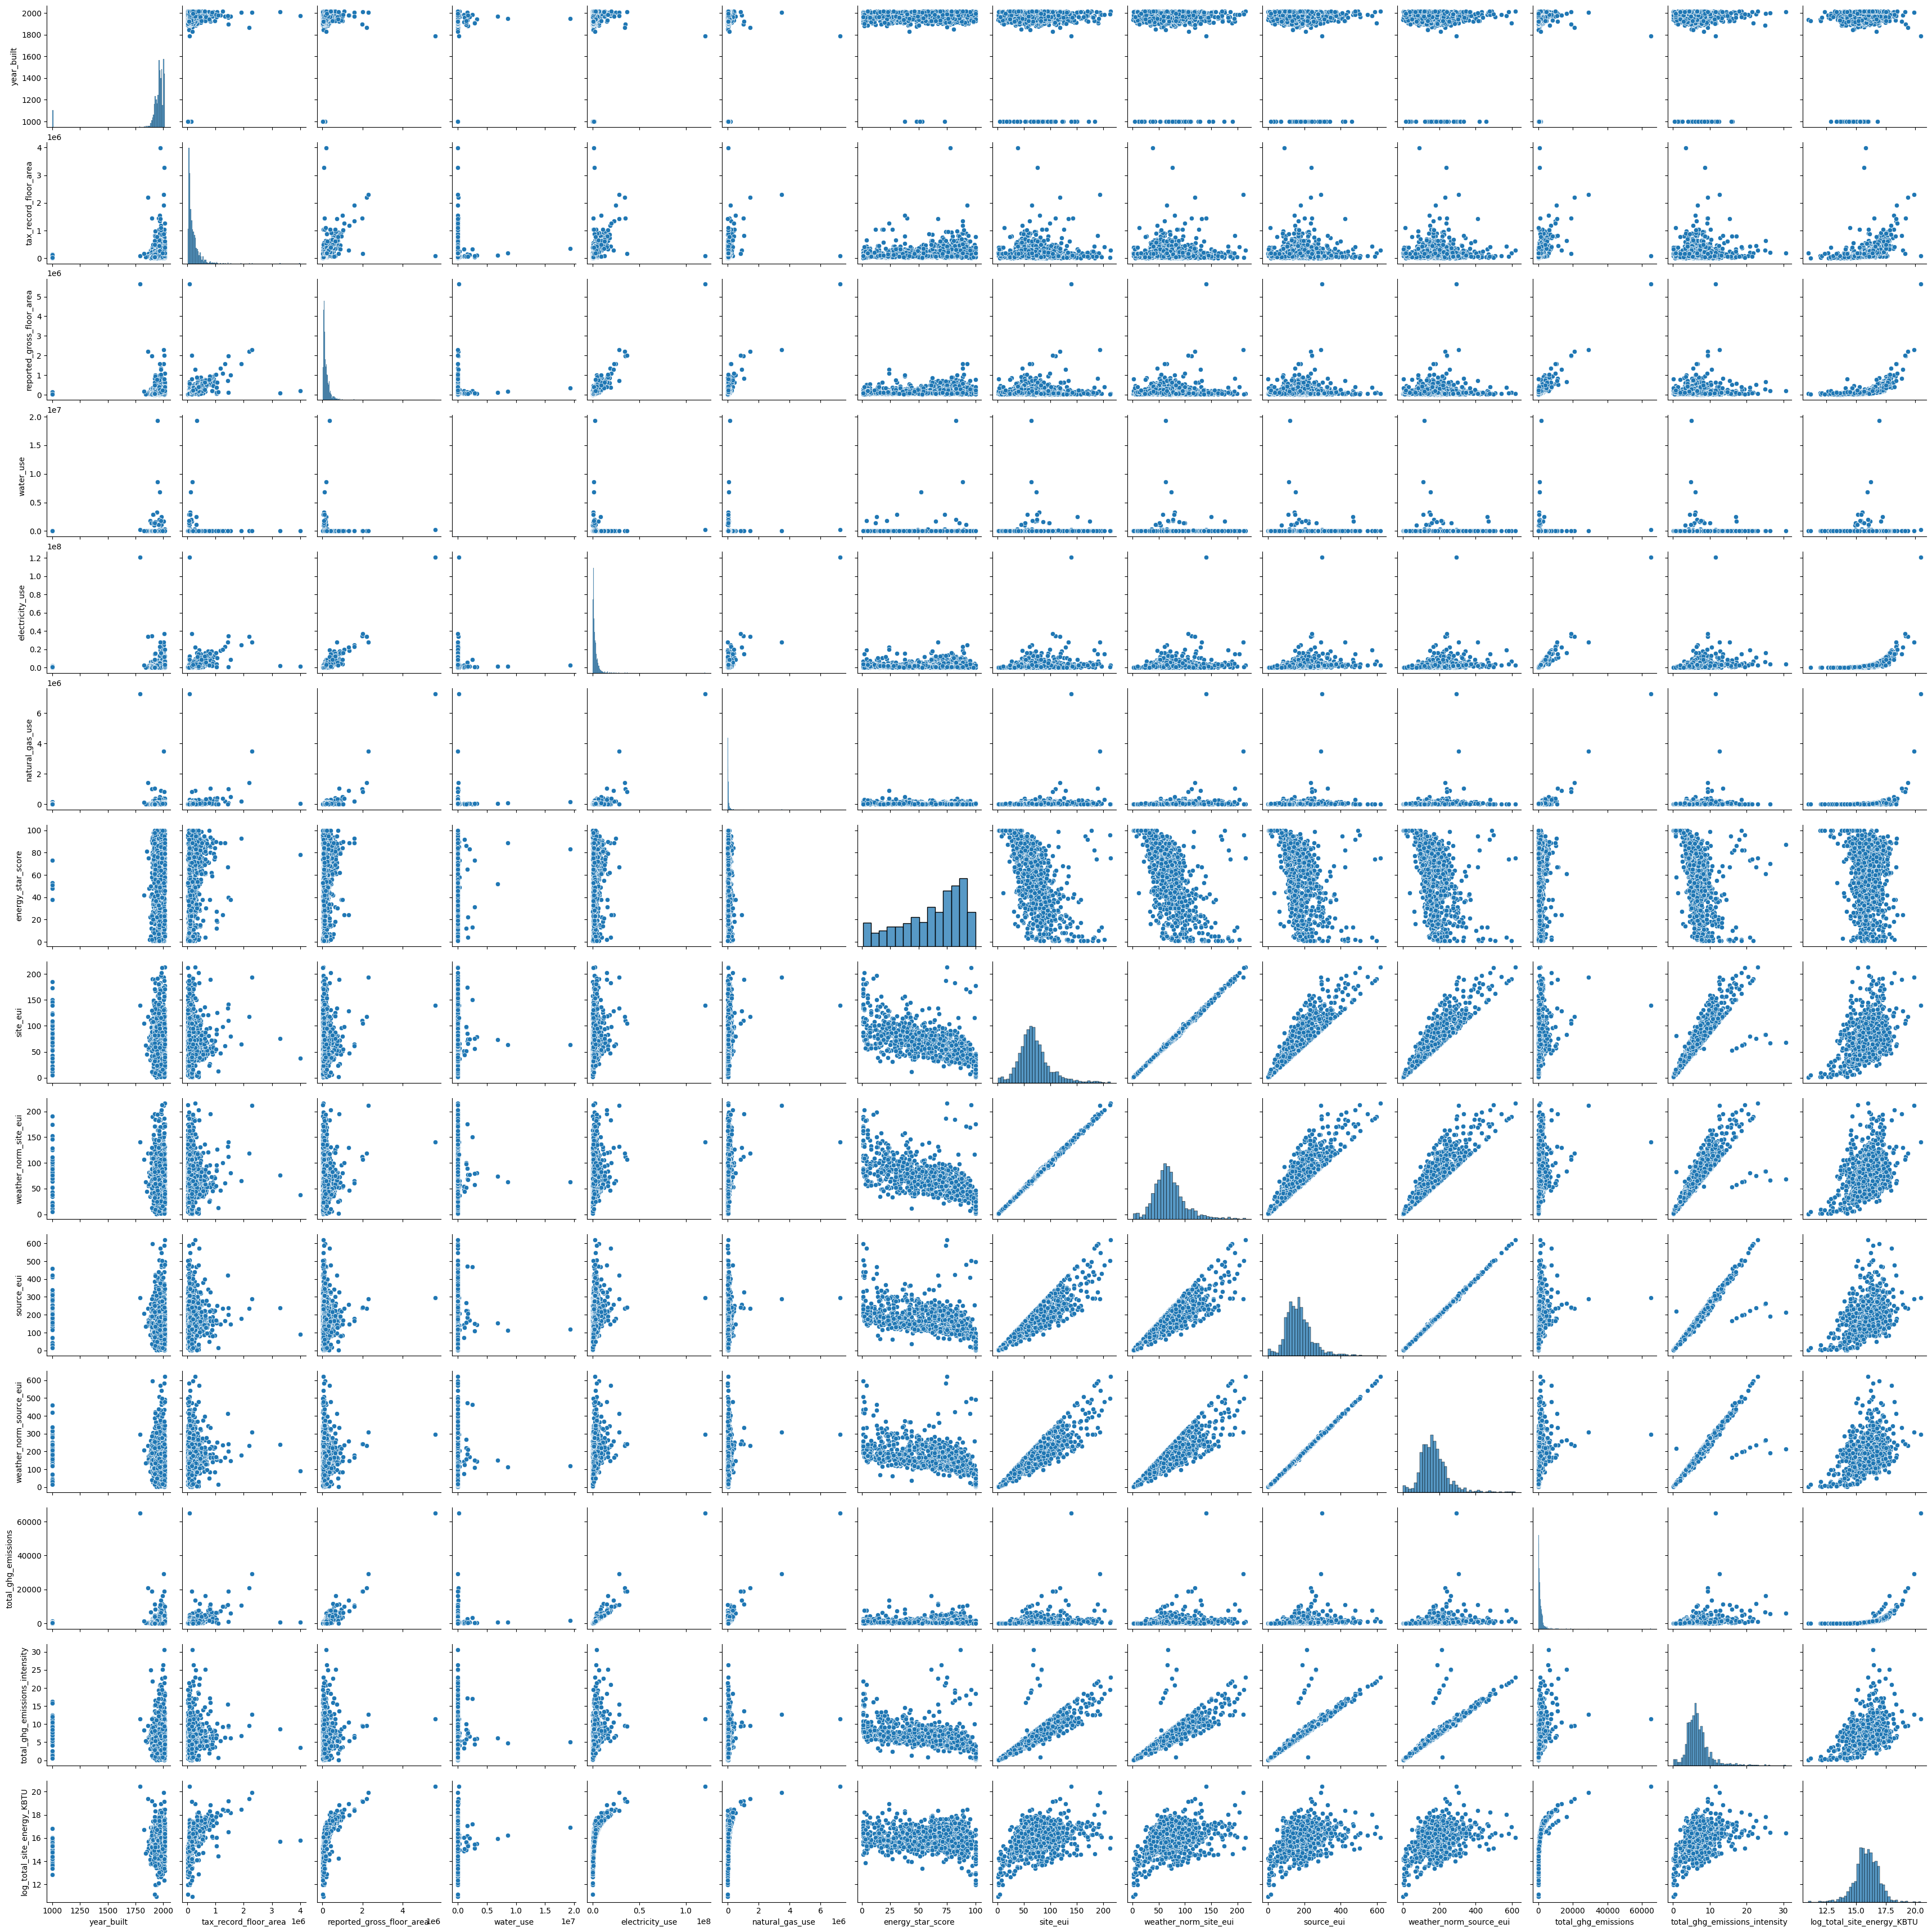

In [ ]:
# THIS TAKES A LOOOONG TIME! ~10 MINUTES ON COLAB FOR ME
import seaborn as sns
sns.pairplot(X_numeric_data)
# DELETE OUTPUT!

In [22]:
X_numeric_data.dropna(axis=0, how='any')

,Unnamed: 0,ward,year_built,tax_record_floor_area,reported_gross_floor_area,water_use,electricity_use,natural_gas_use,energy_star_score,site_eui,weather_norm_site_eui,source_eui,weather_norm_source_eui,total_ghg_emissions,total_ghg_emissions_intensity,log_total_site_energy_KBTU
0,1,4,1959,63227.0,65000.0,6963.5,633043.8,44274.183070,9.0,101.3,102.7,175.9,174.9,482.9,7.4,15.700229
2,3,2,1964,330550.0,223218.0,8749.1,3863003.0,64143.386660,76.0,87.8,89.0,215.6,215.0,1852.2,8.3,16.790966
7,8,2,1989,606768.0,517464.0,8321.3,9431956.0,17256.417750,81.0,65.5,65.5,198.8,198.8,3782.3,7.3,17.338745
8,9,2,1966,113547.0,322250.0,3664.5,4778129.0,53754.628560,85.0,68.0,69.7,177.1,178.9,2171.8,6.7,16.902591
11,12,4,1949,63227.0,63224.0,5168.7,266968.0,27917.562900,78.0,58.6,60.7,91.6,92.9,252.7,4.0,15.125174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,1667,4,1928,67000.0,67000.0,3612.4,682062.9,16301.078330,65.0,59.1,59.4,134.6,134.9,353.5,5.3,15.191679
1441,1767,3,1923,51541.0,51541.0,1191.3,295148.0,6392.350637,98.0,31.9,32.3,74.4,74.7,149.4,2.9,14.312739
1450,2163,5,2013,186504.0,99365.0,3632.8,1074708.0,7011.827737,89.0,44.0,44.3,123.3,123.6,457.8,4.6,15.290745
1451,2164,5,2013,162898.0,162898.0,5737.4,1740264.0,5418.386531,46.0,39.8,39.8,117.9,117.9,709.7,4.4,15.684746


<Axes: >

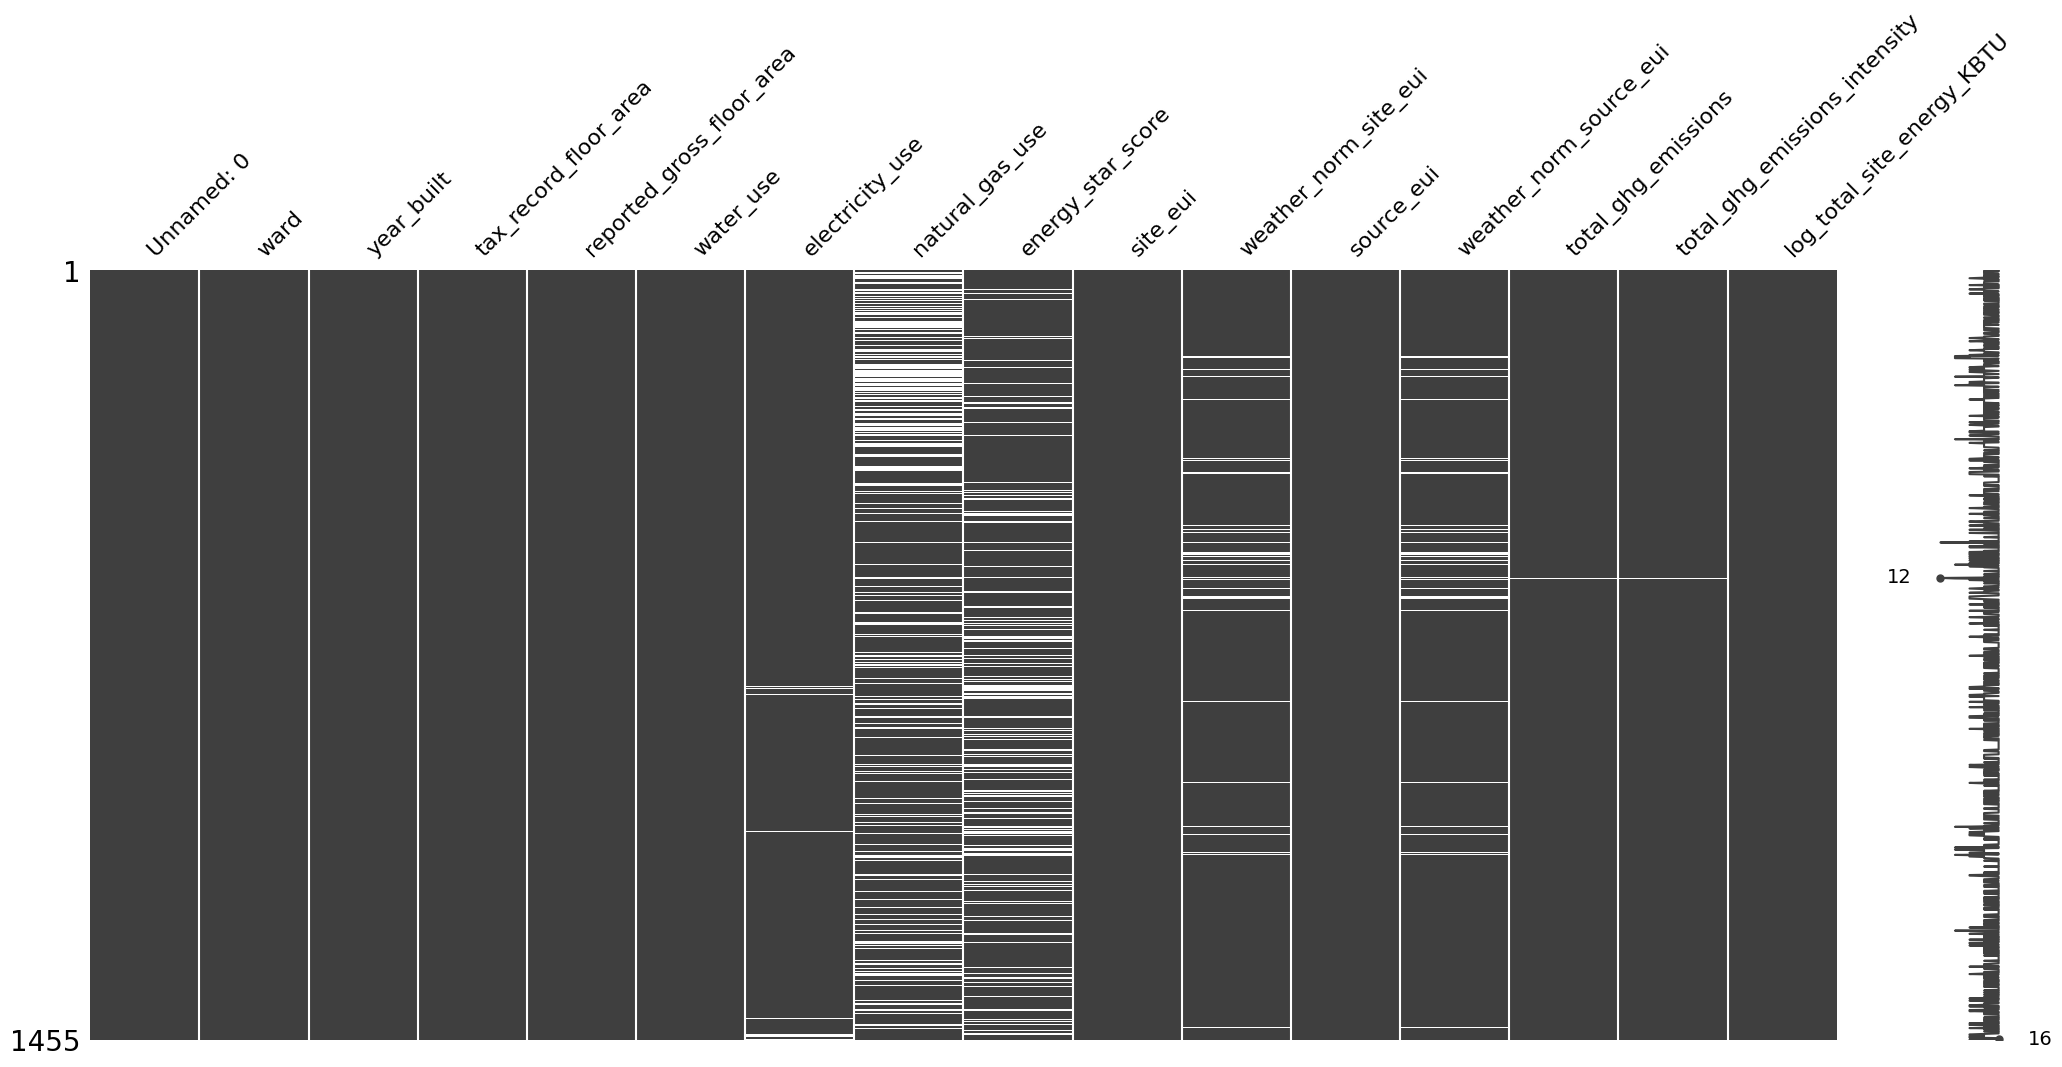

In [23]:
msno.matrix(X_numeric_data)

In [24]:
X_numeric_data.head()

,Unnamed: 0,ward,year_built,tax_record_floor_area,reported_gross_floor_area,water_use,electricity_use,natural_gas_use,energy_star_score,site_eui,weather_norm_site_eui,source_eui,weather_norm_source_eui,total_ghg_emissions,total_ghg_emissions_intensity,log_total_site_energy_KBTU
0,1,4,1959,63227.0,65000.0,6963.5,633043.8,44274.18307,9.0,101.3,102.7,175.9,174.9,482.9,7.4,15.700229
1,2,2,1997,251557.0,257943.0,8490.0,5531486.0,NaN,69.0,73.2,73.2,229.8,229.8,2164.4,8.4,16.753689
2,3,2,1964,330550.0,223218.0,8749.1,3863003.0,64143.38666,76.0,87.8,89.0,215.6,215.0,1852.2,8.3,16.790966
3,4,2,1969,256839.0,213067.0,5393.8,2936445.0,NaN,87.0,47.0,46.4,147.7,145.8,1249.2,5.9,16.119510
4,5,2,1975,370000.0,381518.0,10422.6,7345290.0,NaN,85.0,65.7,65.7,206.3,206.3,2874.1,7.5,17.037012


Skewness of Numeric Variables:
water_use                        24.124503
natural_gas_use                  22.356739
total_ghg_emissions              14.538659
electricity_use                  13.354591
reported_gross_floor_area         9.933873
tax_record_floor_area             6.083273
total_ghg_emissions_intensity     1.920579
source_eui                        1.362850
weather_norm_source_eui           1.349641
site_eui                          1.152451
weather_norm_site_eui             1.141538
ward                              0.724130
Unnamed: 0                        0.148921
log_total_site_energy_KBTU       -0.342520
energy_star_score                -0.681216
year_built                       -5.254871
dtype: float64
Columns to consider for log transformation (skew > 0.75): Index(['water_use', 'natural_gas_use', 'total_ghg_emissions',
       'electricity_use', 'reported_gross_floor_area', 'tax_record_floor_area',
       'total_ghg_emissions_intensity', 'source_eui',
       'weat

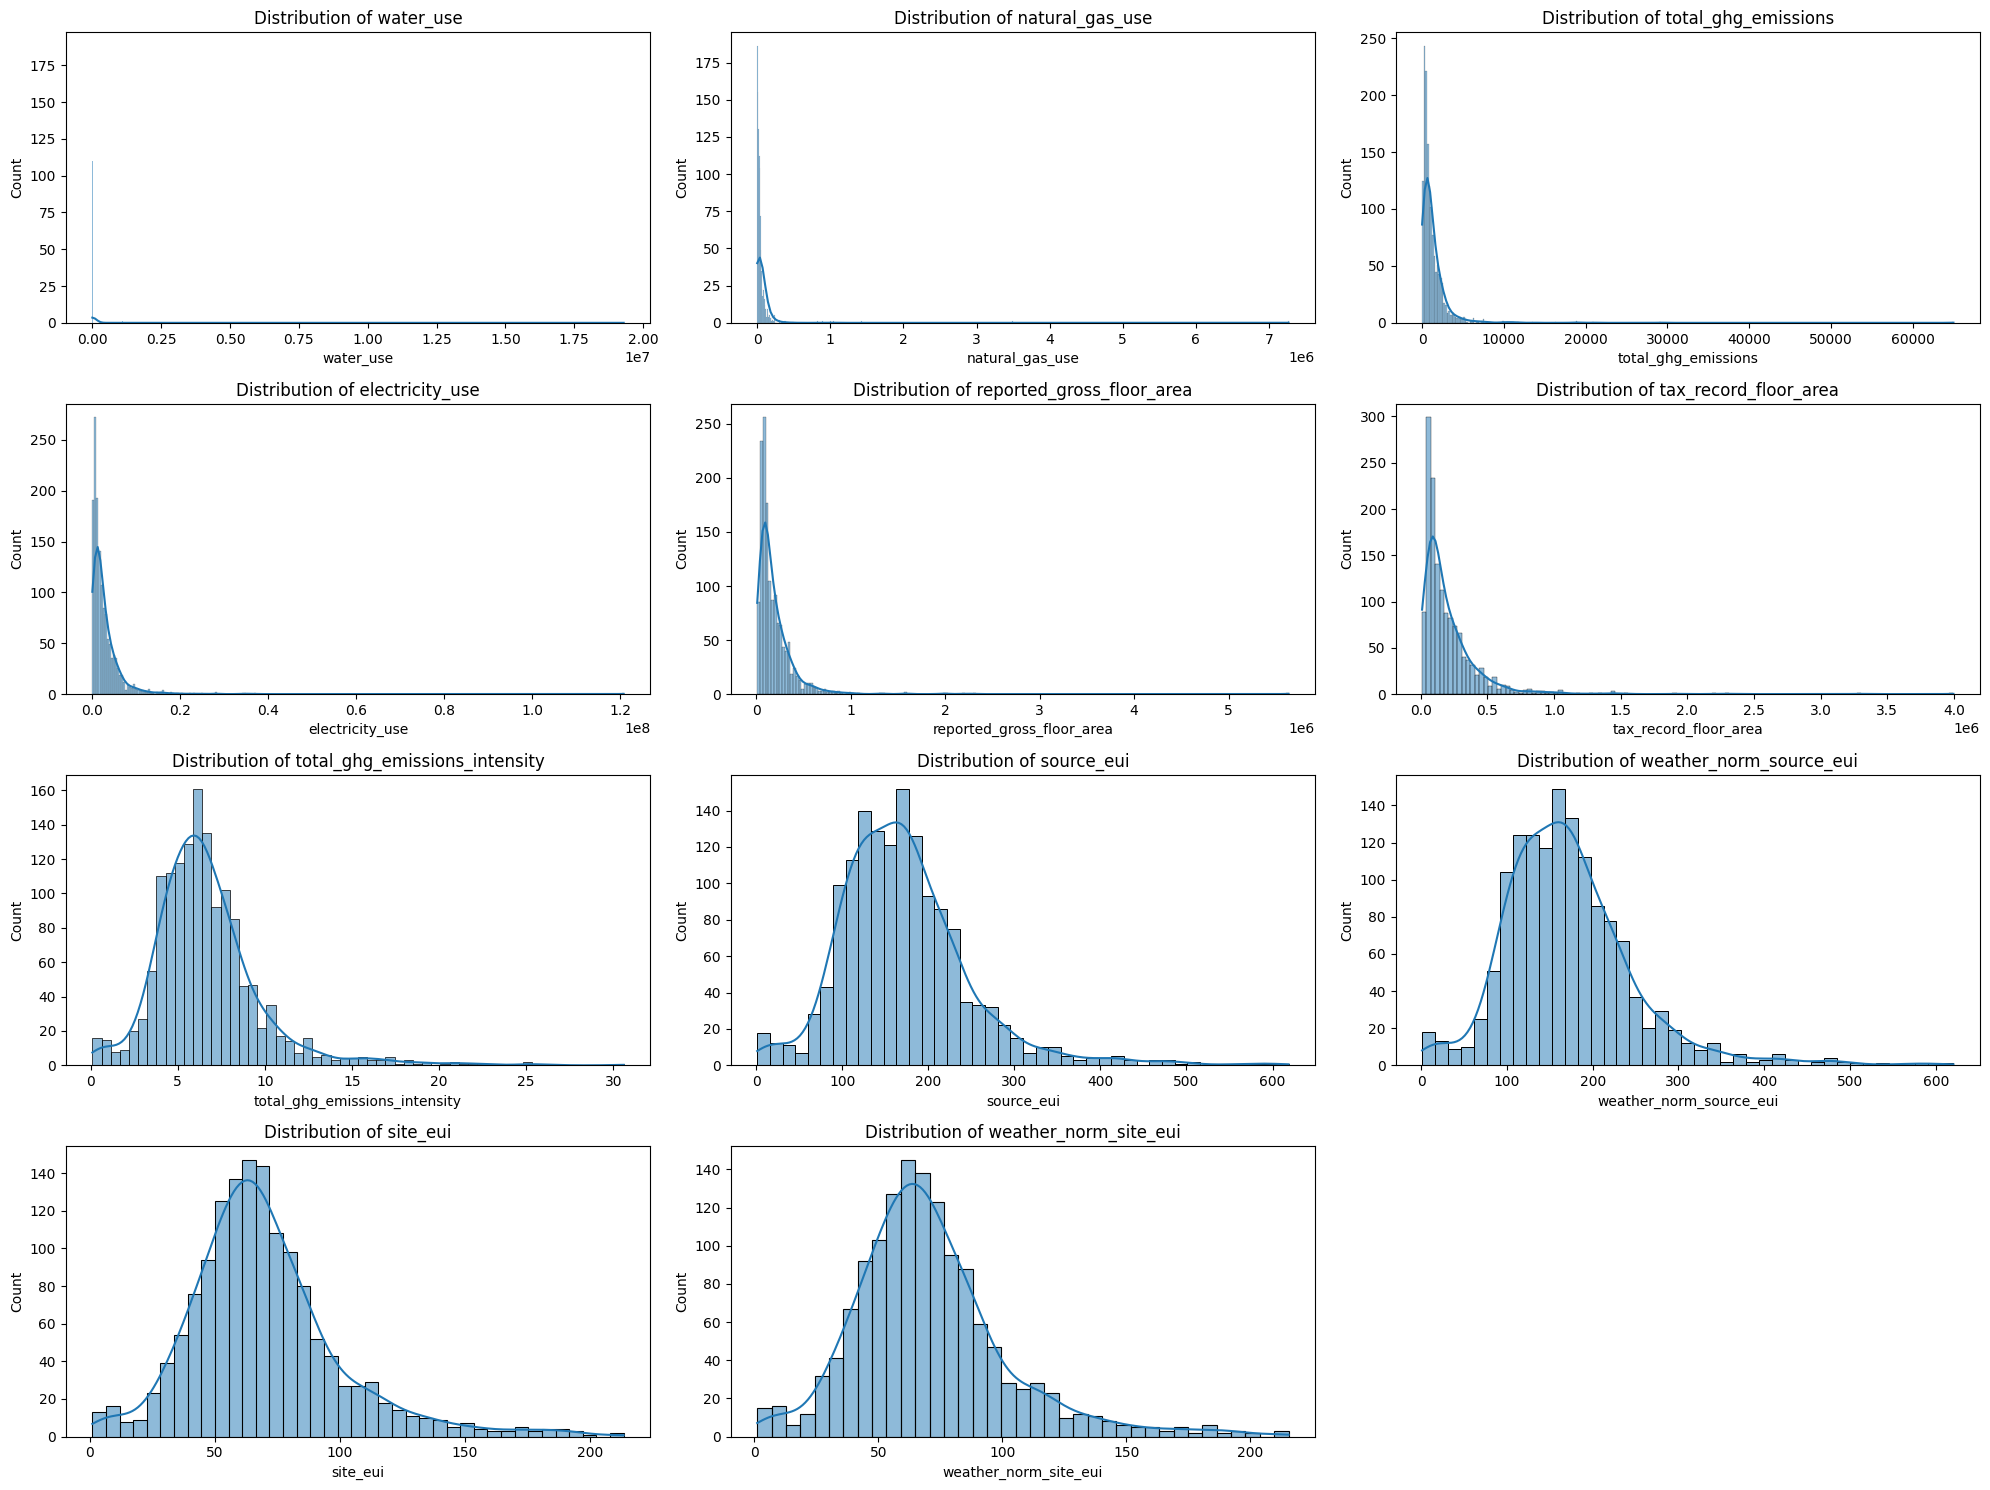

In [25]:
import seaborn as sns
from scipy.stats import skew


# Check skewness of each numeric column
skewness = X_numeric_data.skew().sort_values(ascending=False)
print("Skewness of Numeric Variables:")
print(skewness)

# Define threshold for skewness to consider log transformation
# Generally, skewness above 0.75 indicates that log transformation could be beneficial
skewed_columns = skewness[skewness > 0.75].index
print(f"Columns to consider for log transformation (skew > 0.75): {skewed_columns}")

num_cols = len(skewed_columns)
num_rows = (num_cols + 2) // 3


# Plot histograms for the skewed columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(skewed_columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust the number of rows/columns if needed
    sns.histplot(X_numeric_data[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


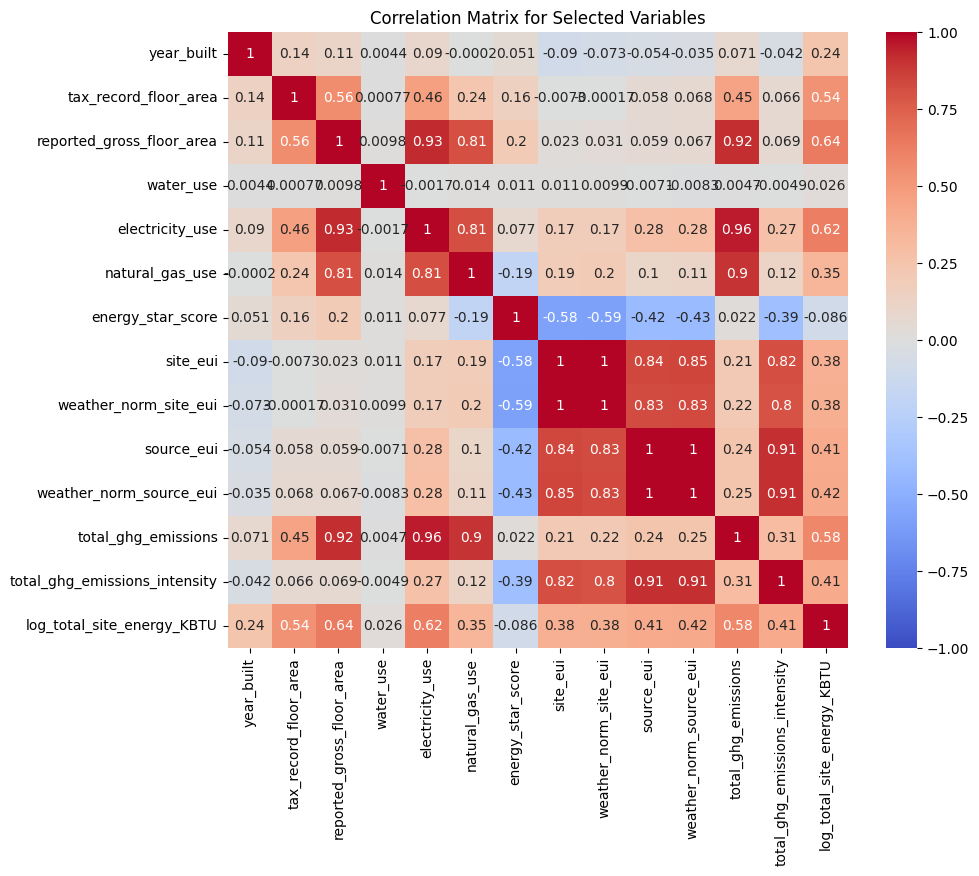

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables you want to check for collinearity
cols_to_check = [
    'year_built',	'tax_record_floor_area','reported_gross_floor_area',	'water_use','electricity_use',
'natural_gas_use',	'energy_star_score',	'site_eui',	'weather_norm_site_eui',	'source_eui',
'weather_norm_source_eui',	'total_ghg_emissions',	'total_ghg_emissions_intensity',	'log_total_site_energy_KBTU'
]

# Calculate the correlation matrix
corr_matrix = X_numeric_data[cols_to_check].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Selected Variables")
plt.show()

In [27]:
# this does not have to be identical to my output as you may have dropped different variables
print("there are (rows, columns) = ", X_numeric_data.shape, "in the numerical variables")

there are (rows, columns) =  (1455, 16) in the numerical variables


We have droped some variables (e.g. 'tax_record_floor_area', 'electricity_use',  'natural_gas_use', 'site_eui', 'weather_norm_site_eui','total_ghg_emissions_intensity','log_total_site_energy_KBTU'])
due to high colonirity.


In [28]:
# which rows should you drop?
X_numeric_data=X_numeric_data.drop(columns=['tax_record_floor_area',
    'electricity_use',
    'natural_gas_use',
    'site_eui',
    'weather_norm_site_eui',
    'total_ghg_emissions_intensity','log_total_site_energy_KBTU'])



In [29]:
X_numeric_data.shape

(1455, 9)

In [30]:
X_numeric_data.head()

,Unnamed: 0,ward,year_built,reported_gross_floor_area,water_use,energy_star_score,source_eui,weather_norm_source_eui,total_ghg_emissions
0,1,4,1959,65000.0,6963.5,9.0,175.9,174.9,482.9
1,2,2,1997,257943.0,8490.0,69.0,229.8,229.8,2164.4
2,3,2,1964,223218.0,8749.1,76.0,215.6,215.0,1852.2
3,4,2,1969,213067.0,5393.8,87.0,147.7,145.8,1249.2
4,5,2,1975,381518.0,10422.6,85.0,206.3,206.3,2874.1


As they do in the original research https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd we should transform some variables into their log values

their original code (which is in R not in python!) is
```
x_seattle$log_total_area=log(x_seattle$gross_floor_area_total_SF)
x_seattle$log_parking_area=log(x_seattle$gross_floor_area_parking_SF)
x_seattle$log_bldg_area=log(x_seattle$gross_floor_area_building_SF)
x_seattle$log_area_1=log(x_seattle$gross_floor_area_property_type_first_SF)

```
the names are a bit different


In [31]:
# note: recheck missing values
# this is important: after I apply the log function to some variables cause log(0) = -infinity
print("there are {} missing or infinity values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

there are 334 missing or infinity values in the numerical data


In [32]:
# translated to python
X_numeric_data["reported_gross_floor_area"] = np.log10(X_numeric_data["reported_gross_floor_area"]+1)
X_numeric_data["water_use"] = np.log10(X_numeric_data["water_use"]+1)
X_numeric_data["total_ghg_emissions"] = np.log10(X_numeric_data["total_ghg_emissions"]+1)
X_numeric_data["source_eui"] = np.log10(X_numeric_data["source_eui"]+1)
X_numeric_data["weather_norm_source_eui"] = np.log10(X_numeric_data["weather_norm_source_eui"]+1)


... #replace ... with your code

Ellipsis

In [33]:
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 0


In [34]:
X_numeric_data.describe()

,Unnamed: 0,ward,year_built,reported_gross_floor_area,water_use,energy_star_score,source_eui,weather_norm_source_eui,total_ghg_emissions
count,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1184.000000,1455.000000,1393.000000,1454.000000
mean,793.997938,3.472852,1940.804811,5.111319,3.566672,62.090372,2.186525,2.185948,2.885004
std,469.582655,2.047691,167.230361,0.374842,0.636981,26.792483,0.239063,0.241361,0.451487
min,1.000000,1.000000,1000.000000,3.962464,0.000000,1.000000,0.342423,0.342423,0.612784
25%,380.500000,2.000000,1947.000000,4.851982,3.292045,43.750000,2.089375,2.088490,2.603631
50%,794.000000,2.000000,1971.000000,5.084769,3.609039,70.000000,2.215638,2.215902,2.879725
75%,1176.500000,5.000000,1994.000000,5.375140,3.845699,84.000000,2.316913,2.318898,3.186235
max,2181.000000,8.000000,2017.000000,6.750886,7.285420,100.000000,2.792111,2.793511,4.812870


check what happened to missing values: they may have grown! because  log(0) = -infinity - fix infinities replacing them with NaN

(in in https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd they had replaced them with 0 but I object to that)

In [35]:
# this has to return 0 now
X_numeric_data.replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 0


In [36]:
print("the numerical data contains (rows, columns) = ", X_numeric_data.shape)
print("there are {} missing values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

the numerical data contains (rows, columns) =  (1455, 9)
there are 334 missing values in the numerical data



you can use `KNNImputer` on the numerical variables, but KNNImputer would fail on categorical variables so you are left with NaNs on categorical variables, which you then need to drop before you run the Random Forest


You can impute separately the numerical and categorical variables, the numerical ones with KNNImputer and the categorical ones with SimpleImputer

## TASK 2.2 use Nearest Neighbor Imputer to impute missing values in numerical features

here we are deviating from the paper. NN imputation is simpler and more common, I think it may be more useful to you in general

In [37]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
Xn = imputer.fit_transform(X_numeric_data)

Xn

array([[1.00000000e+00, 4.00000000e+00, 1.95900000e+03, ...,
        2.24772783e+00, 2.24526584e+00, 2.68475562e+00],
       [2.00000000e+00, 2.00000000e+00, 1.99700000e+03, ...,
        2.36323580e+00, 2.36323580e+00, 3.33553813e+00],
       [3.00000000e+00, 2.00000000e+00, 1.96400000e+03, ...,
        2.33565845e+00, 2.33445375e+00, 3.26792229e+00],
       ...,
       [2.16500000e+03, 5.00000000e+00, 2.01400000e+03, ...,
        2.24600590e+00, 2.24723655e+00, 3.11417714e+00],
       [2.16800000e+03, 1.00000000e+00, 1.97900000e+03, ...,
        1.17026172e+00, 1.17026172e+00, 2.00860017e+00],
       [2.18100000e+03, 1.00000000e+00, 1.99400000e+03, ...,
        1.24054925e+00, 1.24054925e+00, 2.27392678e+00]])

## TASK 2.3 Impute missing categorial variables
you will have to remove Nan values and replace them.

You can use `sklearn.impute.SimpleImputer using strategy="most_frequent"` on all variables, but you will have a naif solution for numerical imputations

I prefer to replace them with "None" or a similar string, for which you can use the fillna method: ```df.fillna("None")``` and leave it at that or with a little more effort you can input values based on nearest neighbors or some other inputation scheme. any choice goes so long as it is well described and justified with words.

In [38]:
for col in X_categorical_data.select_dtypes(include=['category']).columns:
    # Add "None" to the categories if it's not already present
    if "None" not in X_categorical_data[col].cat.categories:
        X_categorical_data[col] = X_categorical_data[col].cat.add_categories(["None"])

# Now you can safely fill NaN values with "None"
X_categorical_data = X_categorical_data.fillna("None")

# Display the filled categorical features
X_categorical_data.head()

,report_status,postal_code,primary_ptype_self,primary_ptype_epa,metered_areas_energy,metered_areas_water
0,In Compliance,20011,Multifamily Housing,Multifamily Housing,Whole Building,Whole Building
1,In Compliance,20005,Office,Office,Whole Building,Whole Building
2,In Compliance,20036,Office,Office,Whole Building,Whole Building
3,In Compliance,22202,Office,Office,Whole Building,Whole Building
4,In Compliance,20037,Office,Office,Whole Building,Whole Building


In [39]:
### here you replace NaN in categorical with one of the options above
X_categorical_data = X_categorical_data.fillna("None")

# Display the filled categorical features
X_categorical_data.head()

,report_status,postal_code,primary_ptype_self,primary_ptype_epa,metered_areas_energy,metered_areas_water
0,In Compliance,20011,Multifamily Housing,Multifamily Housing,Whole Building,Whole Building
1,In Compliance,20005,Office,Office,Whole Building,Whole Building
2,In Compliance,20036,Office,Office,Whole Building,Whole Building
3,In Compliance,22202,Office,Office,Whole Building,Whole Building
4,In Compliance,20037,Office,Office,Whole Building,Whole Building


# TASK 3 One Hot Encode the Categorical Variables

Hint: Once you have done the fit and the transformation, which gives you the transformed data according to the new encoding, what you get is normally a sparse matrix. In principle there is an argument `sparse` to `OneHotEncoder` which should prevent this and give you a dense matrix, which is much easier to handle (consider asking me or looking up what is a sparse matrix!). That attribute did not work for me so once I applied the new encoding I converted the result to a dense matrix as
`Xc = Xc.todense()`

Finally, you will need to use a specific method to get the new names of the variables. Its a method of your model (which I called ohe below) and you can find it in this page here https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [40]:
X_categorical_data.describe()

,report_status,postal_code,primary_ptype_self,primary_ptype_epa,metered_areas_energy,metered_areas_water
count,1455,1455,1455,1455,1455,1455
unique,2,52,45,45,3,3
top,In Compliance,20005,Office,Multifamily Housing,Whole Building,Whole Building
freq,1411,139,490,485,1434,1434


In [41]:
from sklearn.preprocessing import OneHotEncoder
# DELETE
#your code here
ohe = OneHotEncoder(sparse_output=False, drop='first')
Xc = ohe.fit_transform(X_categorical_data)

encoded_columns = ohe.get_feature_names_out(X_categorical_data.columns)
df_encoded = pd.DataFrame(Xc, columns=encoded_columns)

df_final = df_encoded#pd.concat([X_categorical_data.drop([X_categorical_data.columns], axis=1), df_encoded], axis=1)

print(df_final)
#Xc.shape

      report_status_In Compliance  postal_code_20001-2620  \
0                             1.0                     0.0   
1                             1.0                     0.0   
2                             1.0                     0.0   
3                             1.0                     0.0   
4                             1.0                     0.0   
...                           ...                     ...   
1450                          1.0                     0.0   
1451                          1.0                     0.0   
1452                          1.0                     0.0   
1453                          0.0                     0.0   
1454                          0.0                     0.0   

      postal_code_20001-3710  postal_code_20002  postal_code_20002-3408  \
0                        0.0                0.0                     0.0   
1                        0.0                0.0                     0.0   
2                        0.0              

In [42]:
# there is a speific method of ohe that allows you to get the names of the features after the encoding is done
feature_name_cat = ohe.get_feature_names_out(X_categorical_data.columns)
feature_name_cat

array(['report_status_In Compliance', 'postal_code_20001-2620',
       'postal_code_20001-3710', 'postal_code_20002',
       'postal_code_20002-3408', 'postal_code_20002-7000',
       'postal_code_20003', 'postal_code_20004', 'postal_code_20005',
       'postal_code_20005-2806', 'postal_code_20005-3301',
       'postal_code_20005-5504', 'postal_code_20006',
       'postal_code_200062407', 'postal_code_200063912',
       'postal_code_20007', 'postal_code_20008', 'postal_code_20008-1811',
       'postal_code_20009', 'postal_code_20010', 'postal_code_20011',
       'postal_code_20011-4959', 'postal_code_20012', 'postal_code_20015',
       'postal_code_20016', 'postal_code_200163300', 'postal_code_20017',
       'postal_code_200171566', 'postal_code_20018',
       'postal_code_20018-2505', 'postal_code_20019', 'postal_code_20020',
       'postal_code_20024', 'postal_code_200242459', 'postal_code_20032',
       'postal_code_20036', 'postal_code_200362103', 'postal_code_20037',
       'posta

# Task 4 recombine your numerical and categorical imput features and split your data into training and testing

In [43]:
# this dont need to be the same for you
Xn.shape

(1455, 9)

In [44]:
# this dont need to be the same for you
Xc.shape

(1455, 144)

In [45]:
X = np.hstack([Xn, Xc])
X.shape

(1455, 153)

In [46]:
print("The dataset has {} features (!!!)".format(X.shape[1]))

The dataset has 153 features (!!!)


In [47]:
# make a train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TASK 5 run a random forest REGRESSION model

report the score on the tranining and test data and identify the most important features

(hint: if you see "ValueError: Input contains NaN, infinity or a value too large for dtype('float64')." check
1. np.isnan(Xn).sum().sum() and np.isnan(Xc).sum().sum() both return 0
2. np.isinf(Xn).sum().sum() returns 0
3. all the feature that had very large numbers (> 1e5) have been converted to the log of their values

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
print ("the model test accuracy is {:.2}".format(rf.score(X_test, y_test)))

the model test accuracy is 0.68


In [50]:
#this is how you see the importance of the features
rf.feature_importances_[:10]

array([4.64138579e-03, 6.45397467e-04, 4.67547120e-03, 2.53230629e-01,
       2.12834018e-02, 2.57436500e-03, 1.96919520e-03, 2.60944873e-03,
       5.64905077e-01, 2.31719639e-04])

In [51]:

feature_names = X_numeric_data.columns.tolist() + list(feature_name_cat)
len(feature_names)

153

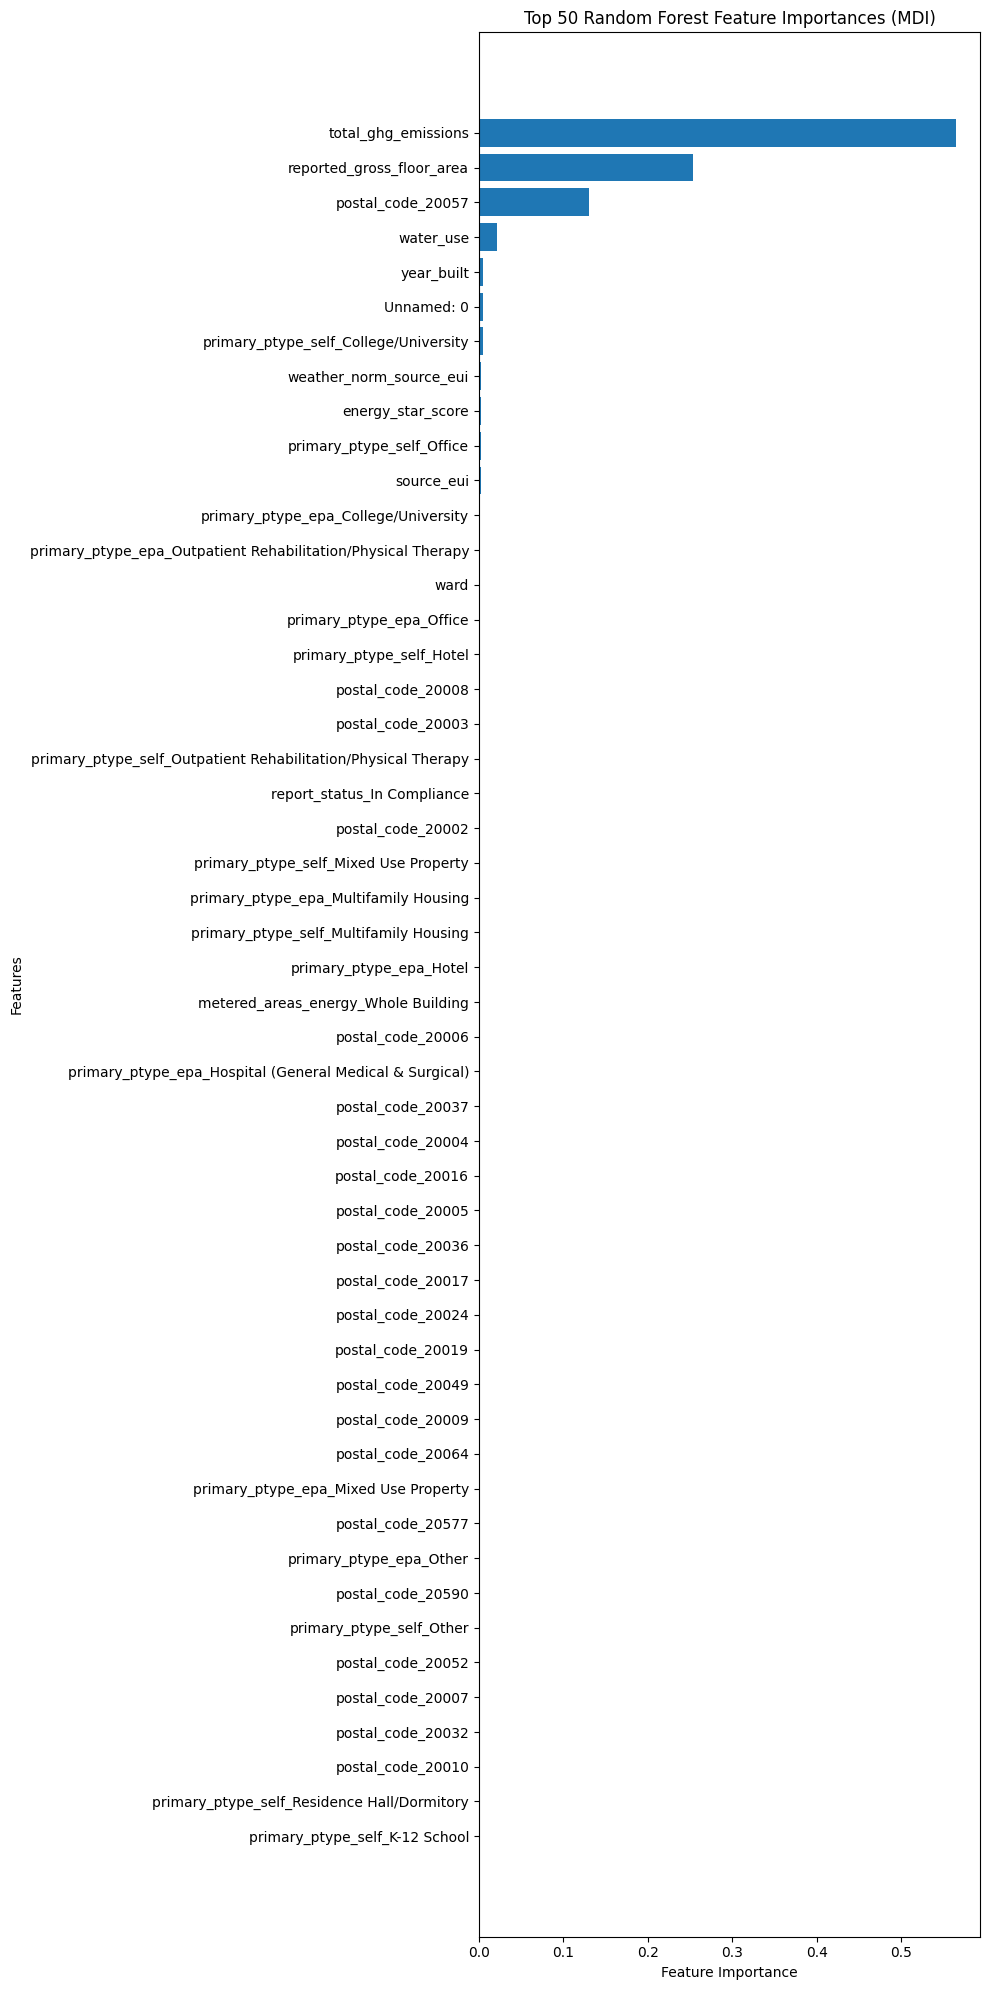

In [52]:
sorted_idx = rf.feature_importances_.argsort()  # Get sorted indices based on feature importances
top_n = 50  # Number of top features to display
top_sorted_idx = sorted_idx[-top_n:]  # Slice to get the top 50 feature indices

# Plot
fig, ax = plt.subplots(figsize=(10, 20))
y_ticks = np.arange(0, top_n)  # Define the y-ticks for the top 50 features
ax.barh(y_ticks, rf.feature_importances_[top_sorted_idx])  # Plot horizontal bar chart
ax.set_yticks(y_ticks)
ax.set_yticklabels([feature_names[i] for i in top_sorted_idx])  # Set y-tick labels based on feature names
ax.set_title("Top 50 Random Forest Feature Importances (MDI)")
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Features")
fig.tight_layout()

plt.show()

In [ ]:
# CAPTION HERE! How is your model, How is your feature importance results? what can you notice? is it interesting? is it insightful??

The model had a test accuracy is 0.64

The feature importance results reveal some interesting insights.

The **total_ghg_emissions** variable appears as the most significant feature by a large margin, indicating that greenhouse gas emissions are strongly related to the target variable,**total_site_energy_KBTU**. This might suggest a strong correlation between energy usage and emissions, which aligns with typical expectations for building energy studies. Also the**reported_gross_floor_area** and certain postal_code features also show high importance. The importance of floor area is expected since larger buildings generally consume more energy. The importance of specific postal codes might indicate geographical clusters where certain types of buildings or energy usage patterns dominate.

Variables like source_eui, energy_star_score, and year_built contribute to the model, but to a lesser extent than emissions and area. These factors are also commonly used in energy efficiency assessments but seem less predictive in this dataset compared to emissions and building area.

Categorical Variables: Certain categorical variables, like primary_ptype and ward, appear as moderately important. This is notable because it indicates that the type of property or its location within certain wards affects energy usage patterns.

Overall, the model seems to be capturing meaningful relationships.

# TASK 6 do it for another city! note: the variable names wont be the same


# useful links and methods and functions I used:

```df.dropna()``` to remove observation with missing variables

```df.drop(columns, axis=1)``` to remove features (columns)


```np.log10()``` and ```np.isinf()``` to convert to log space and find infinite values  

`np.hstack([X1, X2])` to concatenate two arrays


one hot encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html and https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/


KNN imputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html , https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/, and
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/  